# Analizing Videos' Details of Red Bull Batalla de Gallos' Youtube Channel

> This is a EDA applied to data from a Youtube Channel.

- toc: true 
- badges: true
- comments: true
- categories: [EDA,Python,Pandas,Data Analysis]
- image: images/chart-preview.png

## TL;DR 🤓

This project's aim is to perform some common EDA tasks on the created dataset containing information of all International Matches of Freestyle organized by Red Bull from 2015 to 2020 (filtered by `internacional` and ` vs ` keywords). **Red Bull Batalla de los Gallos** is the Most Recognized **Freestyle Competition in Spanish** that brings together the **16 winning Freestylers** from the competitions organized by Red Bull in each country. After all matches only one of them is crowned as international champion [Click here to learn more](https://rap.fandom.com/es/wiki/Red_Bull_Batalla_de_los_Gallos)

## Importing Libraries ✔️

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import re
# import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

from datetime import datetime

# check Pandas' version
pd.__version__

'1.1.5'

## Importing dataset 🗃️

In [ ]:
data_url = 'https://raw.githubusercontent.com/mrenrique/EDA-to-Youtube-Channel-Videos/main/clean_data.csv'
data = pd.read_csv(url)

# show first three rows
data.head(3)

,id,title,views,year,length,likes,dislikes
0,0,ACZINO vs EXODO LIRICAL,577503,2020,00:06:16,14040,270
1,1,EXODO LIRICAL vs RAPDER,238463,2020,00:12:30,8135,927
2,2,ACZINO vs SKONE,756352,2020,00:10:06,18458,1146


## Getting to know our Dataset better ✔️

Let's take a look at the datafame's properties for a better understanding to know what needs to be done. To do so, we can use the `info()` method which gives us the number of columns, **columns names** and their **data types** all together.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        92 non-null     int64 
 1   title     92 non-null     object
 2   views     92 non-null     int64 
 3   year      92 non-null     int64 
 4   length    92 non-null     object
 5   likes     92 non-null     int64 
 6   dislikes  92 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.2+ KB


In [ ]:
data.shape

print("The Dataset has", data.shape[0],"rows with", data.shape[1],"features")

The Dataset has 92 rows with 7 features




---



In [ ]:
data['title'].value_counts()

## Modifying the Dataset

In [ ]:
data['Freestyler A'] = [i.lower().split(' vs ')[0].strip().title() for i in data['title']]
data['Freestyler B'] = [i.lower().split(' vs ')[1].strip().title() for i in data['title']]

#Moving the columns position
data.columns.tolist()

data = data[['id', 'title', 'Freestyler A', 'Freestyler B', 'views', 'year', 'length', 'likes', 'dislikes']]

data.sample(5)

,id,title,Freestyler A,Freestyler B,views,year,length,likes,dislikes
61,61,ARKANO vs PEPE GRILLO,Arkano,Pepe Grillo,1793765,2017,00:06:57,21249,7984
30,30,VALLES-T vs ACZINO,Valles-T,Aczino,16277039,2019,00:13:46,279388,9027
84,84,ACZINO vs ARKANO,Aczino,Arkano,16020247,2015,00:09:57,133895,5419
20,20,FRANCO vs YARTZI,Franco,Yartzi,1025957,2019,00:07:12,20451,252
75,75,SKONE vs PAPO,Skone,Papo,3424620,2016,00:04:47,44916,20190


In [ ]:
# data['title'].value_counts().head(5)
# data['title'].value_counts().loc[lambda x : x > 1]

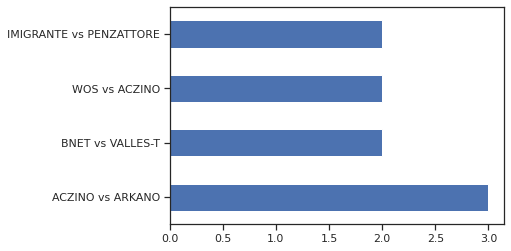

In [ ]:
data['title'].value_counts().loc[lambda x : x > 1].plot(kind='barh')

In [ ]:
# data['title'].value_counts().to_frame()
data['Freestyler A'].value_counts()

In [ ]:
sirve pa otra grafica
# data.groupby(['year','Freestyler A']).size()
# data.groupby(['Freestyler A','year']).size().groupby(level=1).max()

In [ ]:
data[data['title'].str.contains('SNK')]

,id,title,Freestyler A,Freestyler B,views,year,length,likes,dislikes
14,14,NAICEN vs SNK,Naicen,Snk,66128,2020,00:06:44,3196,200
22,22,JAZE vs SNK,Jaze,Snk,1407134,2019,00:07:06,28687,890
24,24,SNK vs ZASKO MASTER,Snk,Zasko Master,588253,2019,00:06:02,14385,583
26,26,SNK vs ACZINO,Snk,Aczino,1204854,2019,00:06:58,24243,473
27,27,SNK vs BNET,Snk,Bnet,2154417,2019,00:09:01,40675,1061




---



In [ ]:
data[data['year'] == '2018']
# do the same
data[data['year'].eq('2018')]

# show all rows but not of this years
data[~data['year'].eq('2018') & data['title'].str.find(' vs ')]

In [ ]:
years = [2018, 2017]
data[data['year'].isin(years)]